<a href="https://colab.research.google.com/github/sebct0402/Proyectos---Python/blob/main/An%C3%A1lisis_Exploratorio_Datos_Admitidos_Icesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análsis Exploratorio de datos - Proyecto de Clasifición para Estudiantes y Facultades de la Universidad Icesi

Grupo conformado por:
- Carlos Tafur.
- Miguel Jaramillo.
- Juan Yustes.
- Sebastián Correa.

##Carga de datos y librerías a usar

In [ ]:
#Aquí se cargan todas las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora carguemos el dataframe en una variable. Inicialmente los datos fueron decodificados en "latin-1" pues mediante UFT-8 la carga no se ejecutó.

In [ ]:
df = pd.read_csv(
    '/content/Admitidos_2018-2025_anonimizado.csv',
    sep=';',
    encoding='latin-1',  #Se carga en latin-1 puesto que el formato en UFT-8 nos genera un error de carga
    low_memory=False)

##Limpieza inicial de Datos.

Veamos nuestro conjunto de datos cargados.

In [ ]:
df.head()

,Periodo AdmisiÃ³n,Fecha InscripciÃ³n,Fecha solicitud completada,Programa,Tipo ID,Fecha Nacimiento,Puntaje Icfes,Fecha Icfes,Puesto Icfes,CÃ³digo Colegio,...,CrÃ©ditos U,Valor Icetex,Valor matricula,Valor procultura,CrÃ©ditos U (PCR),Fecha pago matricula,Valor matricula.1,Saldo Pre,source_file,Unnamed: 78
0,201720.0,26/09/2017,NaN,ADD,CC,2/03/1999,336.0,12/03/2017,76.0,C01407,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,201810 - 12-02-2025.csv,NaN
1,201810.0,21/11/2017,21/11/2017,ADD,CC,24/04/2000,336.0,27/08/2017,NaN,C07849,...,NaN,18660000.0,0.0,0.0,0.0,NaN,0.0,0.0,201810 - 12-02-2025.csv,NaN
2,201810.0,21/10/2017,21/10/2017,ADD,CC,20/07/1988,NaN,26/03/2006,233.0,C01454,...,NaN,0.0,9090000.0,136350.0,0.0,2/01/2018,9226350.0,0.0,201810 - 12-02-2025.csv,NaN
3,201810.0,28/11/2017,27/11/2017,ADD,TI,22/03/2001,330.0,27/08/2017,NaN,C08338,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,201810 - 12-02-2025.csv,NaN
4,201810.0,5/01/2018,10/01/2018,ADD,CC,11/08/1999,327.0,31/07/2016,NaN,C07849,...,NaN,72854000.0,9090000.0,136350.0,0.0,11/01/2018,9226350.0,0.0,201810 - 12-02-2025.csv,NaN


In [ ]:
df.shape

(20154, 79)

Encontramos un total del 77 columnas y 16676 registros.

Cabe aclarar que el dataframe original contenía un total de 96 columnas de las cuales fueron eliminadas 19, pues estas representaban datos sensibles que permitían identificar y/o contactar a personas reales.

Además, conocemos que la información se encuentra actualizada hasta agosto de 2024; por lo que esta podría ser una limitación del proyecto y se buscará en próximas versiones obtener información más actualizada.

### Problema de codificación

Detectamos un error de codificación que genera caracteres extraños en los datos que contienen tildes y la letra "ñ" (También conocido como mojibake). Este problema se originó durante la carga de los datos y no pudo ser corregido en ese momento. Para solucionarlo, aplicaremos la codificación UTF-8 únicamente en las partes donde se presenta el error, ya que reconvertir todas las columnas provocaba fallas en la ejecución.

In [ ]:
import pandas as pd

def fix_mojibake(x):
    if isinstance(x, str):
        # Solo intentamos corregir si "huele" a mojibake común
        if any(bad in x for bad in ("Ã", "Â", "â€", "â€™", "â€œ", "â€\x9d")):
            for enc in ("latin1", "cp1252"):  # probar variantes comunes de Windows
                try:
                    return x.encode(enc).decode("utf-8")
                except (UnicodeEncodeError, UnicodeDecodeError):
                    pass
        return x
    return x

# Opción A: pandas >= 2.2 (tiene DataFrame.map)
if hasattr(pd.DataFrame, "map"):
    df = df.map(fix_mojibake)
else:
    # Opción B: versiones anteriores: usar Series.map por columna de texto
    for c in df.select_dtypes(include=["object", "string"]).columns:
        df[c] = df[c].map(fix_mojibake)


In [ ]:
df.head()

,Periodo AdmisiÃ³n,Fecha InscripciÃ³n,Fecha solicitud completada,Programa,Tipo ID,Fecha Nacimiento,Puntaje Icfes,Fecha Icfes,Puesto Icfes,CÃ³digo Colegio,...,CrÃ©ditos U,Valor Icetex,Valor matricula,Valor procultura,CrÃ©ditos U (PCR),Fecha pago matricula,Valor matricula.1,Saldo Pre,source_file,Unnamed: 78
0,201720.0,26/09/2017,NaN,ADD,CC,2/03/1999,336.0,12/03/2017,76.0,C01407,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,201810 - 12-02-2025.csv,NaN
1,201810.0,21/11/2017,21/11/2017,ADD,CC,24/04/2000,336.0,27/08/2017,NaN,C07849,...,NaN,18660000.0,0.0,0.0,0.0,NaN,0.0,0.0,201810 - 12-02-2025.csv,NaN
2,201810.0,21/10/2017,21/10/2017,ADD,CC,20/07/1988,NaN,26/03/2006,233.0,C01454,...,NaN,0.0,9090000.0,136350.0,0.0,2/01/2018,9226350.0,0.0,201810 - 12-02-2025.csv,NaN
3,201810.0,28/11/2017,27/11/2017,ADD,TI,22/03/2001,330.0,27/08/2017,NaN,C08338,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,201810 - 12-02-2025.csv,NaN
4,201810.0,5/01/2018,10/01/2018,ADD,CC,11/08/1999,327.0,31/07/2016,NaN,C07849,...,NaN,72854000.0,9090000.0,136350.0,0.0,11/01/2018,9226350.0,0.0,201810 - 12-02-2025.csv,NaN


Finalmente corrijamos las columnas

In [ ]:
df.columns = df.columns.str.encode('latin1').str.decode('utf-8')
df.columns

Index(['Periodo Admisión', 'Fecha Inscripción', 'Fecha solicitud completada',
       'Programa', 'Tipo ID', 'Fecha Nacimiento', 'Puntaje Icfes',
       'Fecha Icfes', 'Puesto Icfes', 'Código Colegio', 'Nombre Colegio',
       'Ciudad Colegio', 'Categoría', 'Calendario', 'Naturaleza',
       'Clasificación', 'Población', 'Jornada', 'Estrato', 'Edad Aproximada',
       'Género', 'Ciudad Residencia', 'Ciudad Nacimiento',
       'Reserva Cupo Anterior', 'Reserva Cupo Actual', 'Fecha Reserva Cupo',
       'Posible Reserva', 'No Toma Cupo', 'Icetex Aprobado', 'Icetex Estudio',
       'Admitido', 'Fecha Admisión', 'Fecha no Admisión', 'Fecha Entrevista',
       'Resultado Entrevista', 'Decisión Pendiente', 'Fecha Comentarios',
       'Comentarios Antiguos', 'Fecha Comentarios Antiguos', 'Matrícula',
       'Fecha Límite', 'Beca Gobierno', 'Beca Icesos Acces', 'Beca Excelencia',
       'Otra Beca', 'Matemáticas', 'Lectura Crítica', 'Sociales Ciudadanas',
       'Naturales', 'Inglés', 'Razonami

### Filtrado de datos y columnas de utilidad

Para trabajar más eficientemente sobre las columnas que realmente aportan a nuestro análisis, primero aseguremonos de que los registros empleados son los adecuados.

En primer lugar, sólo necesitamos aquellos registros de estudiantes que han sido admitidos, por lo que filtremos nuestros datos:

In [ ]:
df = df[df['Admitido'] == 'Sí']

In [ ]:
df.shape

(15765, 79)

De los 16676 iniciales, encontramos 13167 registros de estudiantes que fueron admitidos. Eso significa que se eliminaron 3509 registros de estudiantes no admitidos.


Procedamos ahora a verificar el tipo de dato y los faltantes de cada fila.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15765 entries, 0 to 20153
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Periodo Admisión              15704 non-null  float64
 1   Fecha Inscripción             15765 non-null  object 
 2   Fecha solicitud completada    11500 non-null  object 
 3   Programa                      15765 non-null  object 
 4   Tipo ID                       15607 non-null  object 
 5   Fecha Nacimiento              15763 non-null  object 
 6   Puntaje Icfes                 14362 non-null  object 
 7   Fecha Icfes                   14442 non-null  object 
 8   Puesto Icfes                  226 non-null    object 
 9   Código Colegio                15287 non-null  object 
 10  Nombre Colegio                15246 non-null  object 
 11  Ciudad Colegio                15218 non-null  object 
 12  Categoría                     13503 non-null  object 
 13  Calend

Encontramos un par de filas sin registros, procederemos a eliminarla

In [ ]:
df.drop(['Prueba Sigma', 'Calificación Normalizada MED', 'Fecha no Admisión'], axis=1, inplace=True)

## Análisis univariado

### Variable Puntaje Icfes

Relevancia de la variable 'Puntaje Icfes' en el contexto de predecir la elección de facultad:

El 'Puntaje Icfes' es altamente relevante en este proyecto teniendo en cuenta que el objetivo es predecir la elección de facultad basándose en datos académicos y demográficos, pues esta es una de las métricas más importantes disponibles en el conjunto de datos y un indicador clave del rendimiento académico previo del estudiante.

Veamos ahora cada punto clave de por qué el puntaje Icfes puede ser una variable de relevancia (predicción de elección de facultad):

* Poder predictivo: Es muy probable que el 'Puntaje Icfes' sea una variable con
un poder predictivo significativo para la elección de facultad, ya que algunas facultades o programas pueden atraer a estudiantes con puntajes ICFES más altos debido a la percepción de rigor académico o requisitos de admisión más exigentes, como por ejemplo, las facultades de Ingenierías o Ciencias de la Salud tienen una mayor proporción de estudiantes con puntajes elevados en comparación con otras facultades.

* Segmentación de estudiantes: El análisis del 'Puntaje Icfes' en relación con la elección de facultad puede ayudar a identificar patrones y segmentos de estudiantes, siendo esto valioso para "mejorar la planificación académica" y "diseñar campañas de mercadeo más efectivas", como se ha mencionado en la justificación del proyecto. Si se identifica que estudiantes con ciertos rangos de puntaje ICFES tienden a elegir facultades específicas, la universidad puede dirigir sus esfuerzos de divulgación y marketing de manera más eficiente.

* Identificación de tendencias a lo largo del tiempo: Al tener datos de 2018 a 2024, se puede analizar si la relación entre el 'Puntaje Icfes' y la elección de facultad ha cambiado con el tiempo y esto es relevante para la "captación y retención de estudiantes" mencionada en el objetivo, ya que las tendencias en los puntajes de los estudiantes que eligen ciertas facultades pueden informar las estrategias de reclutamiento y adaptación de programas a lo largo de los años.

* Base para modelos de clasificación: Como se indica en la justificación, se planean construir modelos de clasificación predictivos, y el 'Puntaje Icfes' será una característica fundamental en estos modelos para predecir a qué facultad es más probable que se inscriba un estudiante.


En conclusión, la variable 'Puntaje Icfes' es esencial para lograr el objetivo de predecir la elección de facultad, ya que proporciona información académica clave que probablemente influye en esta decisión y permite segmentar a los estudiantes para mejorar las estrategias de la universidad en cuanto a planificación, marketing e Identificación de tendencias a lo largo del tiempo.

Iniciemos obteniendo la estadística descriptiva de la variable de interés:

In [ ]:
df['Puntaje Icfes'].describe()

,Puntaje Icfes
count,14362
unique,447
top,350.0
freq,199


A simple vista encontramos algunos valores con poco sentido, cómo lo son puntajes de 999 o 0 en estas pruebas, visualicemoslo mejor desde un diagrama de cajas y un histograma.

In [ ]:
df['Puntaje Icfes'].isnull().sum()

np.int64(1403)

También se debe tener en cuenta que existen varios valores faltanes, posteriormente se deberá verificar la razón de estos faltantes. Algunas hipótesis para esta cantidad son la pandemia (Donde no se presentaron este tipo de pruebas), estudiantes extranjeros y estudiantes con icfes muy antiguos (Cuya escala de valores no coincide con el actual).

In [ ]:
col_icfes = "Puntaje Icfes"

# normaliza el texto y convierte a numérico
s = (
    df[col_icfes]
      .astype(str)
      .str.strip()
      .str.replace(",", ".", regex=False)         # decimales con coma → punto
      .str.replace(r"[^0-9.\-]", "", regex=True)  # quita símbolos/texteo
)

df[col_icfes] = pd.to_numeric(s, errors="coerce")
df[col_icfes].dtype  # debería mostrar float64


dtype('float64')

In [ ]:
# ICFES va de 0 a 500; fuera de rango → NaN para no dañar análisis/gráfico
df.loc[~df[col_icfes].between(0, 500), col_icfes] = np.nan

# chequeos rápidos
n_null = df[col_icfes].isna().sum()
n_out = (~s.isna() & ~df[col_icfes].between(0, 500)).sum()  # si quieres ver cuántos se fueron por rango
n_null, n_out


(np.int64(1406), np.int64(1406))

<Axes: ylabel='Frequency'>

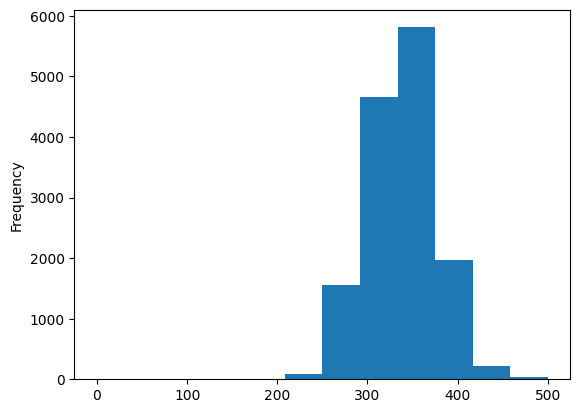

In [ ]:
df['Puntaje Icfes'].plot(kind='hist', bins=12)

Ahora verifiquemos los registros que presentan valores mayores a 500.

In [ ]:
print(df[df['Puntaje Icfes'] > 500])

Empty DataFrame
Columns: [Periodo Admisión, Fecha Inscripción, Fecha solicitud completada, Programa, Tipo ID, Fecha Nacimiento, Puntaje Icfes, Fecha Icfes, Puesto Icfes, Código Colegio, Nombre Colegio, Ciudad Colegio, Categoría, Calendario, Naturaleza, Clasificación, Población, Jornada, Estrato, Edad Aproximada, Género, Ciudad Residencia, Ciudad Nacimiento, Reserva Cupo Anterior, Reserva Cupo Actual, Fecha Reserva Cupo, Posible Reserva, No Toma Cupo, Icetex Aprobado, Icetex Estudio, Admitido, Fecha Admisión, Fecha Entrevista, Resultado Entrevista, Decisión Pendiente, Fecha Comentarios, Comentarios Antiguos, Fecha Comentarios Antiguos, Matrícula, Fecha Límite, Beca Gobierno, Beca Icesos Acces, Beca Excelencia, Otra Beca, Matemáticas, Lectura Crítica, Sociales Ciudadanas, Naturales, Inglés, Razonamiento Cuantitativo, Competencias Ciudadanas, DEBE VER ICARO, Matriculado Ícaro, Debe ver Papiro, Matriculado Papiro, Debe ver PROBO, Matriculado PROBO, Transferencia, Intercambio, EPS, Grupo Sa

de la misma forma, verifiquemos los registros que presentan valores de 0.

In [ ]:
print(df[df['Puntaje Icfes'] == 0])

      Periodo Admisión Fecha Inscripción Fecha solicitud completada Programa  \
1624          201820.0        23/05/2018                 22/05/2018      ANT   

     Tipo ID Fecha Nacimiento  Puntaje Icfes Fecha Icfes Puesto Icfes  \
1624      CC        9/08/1982            0.0  19/08/2000        100.0   

     Código Colegio  ...                                         Créditos U  \
1624         C01338  ...  CCR - Cargo Plan de pagos - Credito Icesi, PCR...   

     Valor Icetex Valor matricula Valor procultura Créditos U (PCR)  \
1624          0.0       6890000.0         103350.0              0.0   

     Fecha pago matricula Valor matricula.1 Saldo Pre  \
1624           14/06/2018         6993350.0       0.0   

                  source_file Unnamed: 78  
1624  201820 - 12-02-2025.csv         NaN  

[1 rows x 76 columns]


Observamos que son sólo 3 casos aislados, por lo que se procederá con la eliminaciónd de estos registros.

In [ ]:
#indices = df[(df['Puntaje Icfes'] > 500)].index
#df.drop(indices, inplace=True)
#indices = df[df['Puntaje Icfes'] == 0].index
#df.drop(indices, inplace=True)

# Forma compacta de hacer el calculo
df = df[df['Puntaje Icfes'].between(1, 500)]

Ahora volvamos a analizar esta variable sin aquellos registros extraños.

In [ ]:
df['Puntaje Icfes'].describe()

,Puntaje Icfes
count,14358.000000
mean,338.117844
std,38.190384
min,198.000000
25%,313.000000
50%,340.000000
75%,364.000000
max,500.000000


Tras depurar valores fuera de rango (>*500) y ceros, la variable Puntaje Icfes queda con 14.538 observaciones. El promedio es 338.17 con desviación estándar de 38.19. El mínimo observado es 198 y el máximo es 500, valor que coincide con el tope de la escala y sugiere un techo/cap en algunos registros. La mediana es 340, y el 50% central de los datos (IQR) se ubica entre 313 (Q1) y 364 (Q3).

Volvamos a obtener los gráficos de caja y el histograma de la variable.

<Axes: >

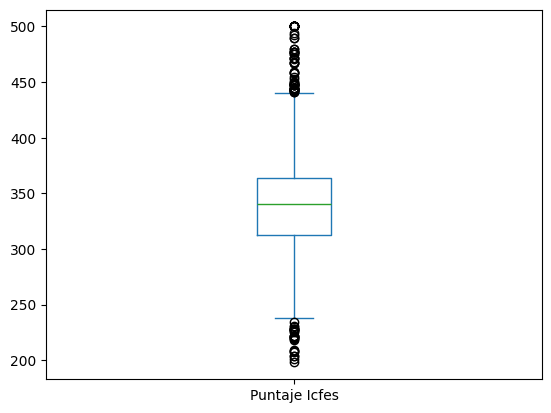

In [ ]:
df['Puntaje Icfes'].plot(kind='box')

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df["Puntaje Icfes"].quantile(0.25)
Q3 = df["Puntaje Icfes"].quantile(0.75)
IQR = Q3 - Q1

# Límites del boxplot
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar outliers
outliers_inf = (df["Puntaje Icfes"] < limite_inferior).sum()
outliers_sup = (df["Puntaje Icfes"] > limite_superior).sum()
outliers_total = outliers_inf + outliers_sup

print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)
print("Outliers por debajo del límite inferior:", outliers_inf)
print("Outliers por encima del límite superior:", outliers_sup)
print("Total de outliers:", outliers_total)

Límite inferior: 236.5
Límite superior: 440.5
Outliers por debajo del límite inferior: 28
Outliers por encima del límite superior: 67
Total de outliers: 95


A partir del criterio de 1.5·IQR, se identificaron 95 observaciones atípicas (≈0.65% del total de 14,538 registros). De estas, 28 se ubican por debajo del límite inferior (<236.5) y 67 por encima del límite superior (>440.5).

Valores superiores: se encuentran en el rango alto de la escala (hasta 500). Son plausibles y no constituyen un error, ya que reflejan desempeños sobresalientes que incluso suelen ser incentivados por la universidad en sus procesos de admisión.

Valores inferiores: aunque factibles (mínimo observado tras depuración: 198), ameritan una revisión más detallada. Es recomendable analizar si corresponden a periodos específicos, cohortes antiguas, estudiantes extranjeros o posibles errores de digitación.

En conclusión, los outliers altos son naturales y esperables, mientras que los bajos requieren un análisis contextual para determinar si responden a condiciones académicas reales o a inconsistencias en el registro.

<Axes: ylabel='Frequency'>

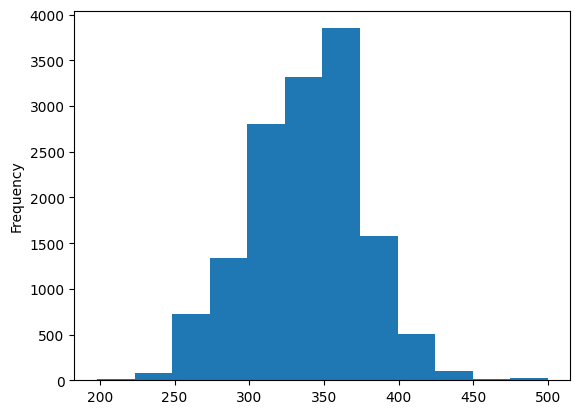

In [ ]:
df['Puntaje Icfes'].plot(kind='hist', bins=12)

Podemos visualizar en este histograma una distribución muy similar a la normal, lo cuál es un comportamient esperado en la variable.

**Conclusiones y observaciones respecto al análisis univariado de "Puntaje Icfes":**

*	La mitad de los estudiantes se encuentra dentro del rango comprendido entre 312 y 364 puntos.
*	Se detectaron valores atípicos irreales como 0, 504 y 999, que fueron depurados del dataset para no distorsionar los resultados.
* Existen un total de 61 otros valores atípicos para los cuáles se deberá definir si existirá algún tratamiento y justificación para ellos.
*	La distribución de la variable se acerca a la normalidad.
* Se deberá hacer un tratamiento para los 1225 registros con nulos en "Puntaje Icfes".

También consideremos las posibilidades de análisis relacionando otras variables. Por ejemplo, sería significativo verificar el comportamiento de esta variable con respecto al periodo de ingreso, edad, facultad (variable target) y entre otras.

### Todas las demás variables

In [ ]:
df.describe()

,Periodo Admisión,Puntaje Icfes,Matemáticas,Lectura Crítica,Sociales Ciudadanas,Inglés,Valor beca,Valor Icetex,Valor matricula,Valor procultura,Créditos U (PCR),Valor matricula.1,Saldo Pre,Unnamed: 78
count,14301.000000,14358.000000,13782.000000,13746.000000,13596.000000,12493.000000,1.435800e+04,1.435800e+04,1.418200e+04,1.418200e+04,1.421500e+04,1.435800e+04,1.435800e+04,3391.000000
mean,202199.766730,338.117844,68.427949,67.476502,66.104442,71.976547,5.818850e+05,1.613549e+07,7.714894e+06,1.179281e+05,4.739187e+05,7.736525e+06,1.448356e+04,49147.480094
std,238.701524,38.190384,11.253019,9.259411,10.528057,11.976710,1.961104e+06,3.549427e+07,6.576629e+06,1.062911e+05,2.020816e+06,6.692978e+06,5.067614e+05,37510.509628
min,201420.000000,198.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.052555e+07,1991.000000
25%,202010.000000,313.000000,62.000000,63.000000,61.000000,65.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9451.000000
50%,202220.000000,340.000000,69.000000,68.000000,67.000000,73.000000,0.000000e+00,0.000000e+00,9.130000e+06,1.369500e+05,0.000000e+00,9.241575e+06,0.000000e+00,53512.000000
75%,202410.000000,364.000000,75.000000,73.000000,72.000000,80.000000,0.000000e+00,0.000000e+00,1.157000e+07,1.735500e+05,0.000000e+00,1.174355e+07,0.000000e+00,54533.000000
max,202610.000000,500.000000,100.000000,100.000000,100.000000,100.000000,2.541000e+07,2.881300e+08,2.541000e+07,1.148438e+06,2.541000e+07,2.655844e+07,2.579115e+07,117734.000000


In [ ]:
df['Edad Aproximada'].describe()

,Edad Aproximada
count,14358
unique,57
top,19
freq,2098


In [ ]:
df.Género.unique()

array(['M', 'F', 'N'], dtype=object)

##Análisis Bi-variado

<Axes: >

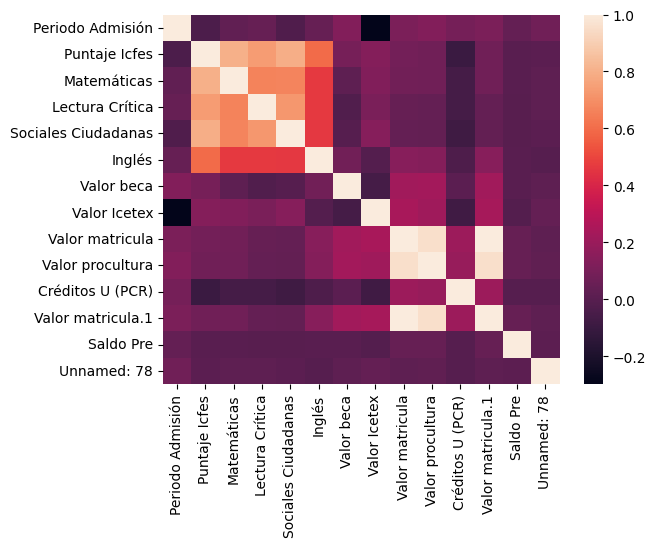

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr())

In [ ]:
df.Programa.unique()

array(['ADD', 'ANT', 'BIO', 'CIP', 'CLP', 'COF', 'DER', 'DIS', 'DMI',
       'ECO', 'ENI', 'IBQ', 'IND', 'LAT', 'LCN', 'LCS', 'LEI', 'LYL',
       'MED', 'MIP', 'MUS', 'PSI', 'QUF', 'QUI', 'SIS', 'SOC', 'TEL',
       'LBP', 'FIN', 'COM', 'IAG', 'IEI', 'BAC', 'MVZ', 'NET'],
      dtype=object)

In [ ]:
len(df.Programa.unique())

35

In [ ]:
indices = df[(df['Programa'] == 'ESH') & (df['Programa'] == 'PO000')].index


In [ ]:
df.Admitido.unique()

array(['Sí'], dtype=object)

Verificar que el Dataframe exista, Detectar el nombre de las columnas que contienen eo codigo de las carreras y definir funciones de apoyo para graficar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Verificar que df existe ---
try:
    assert isinstance(df, pd.DataFrame)
except:
    raise RuntimeError("No encuentro el DataFrame 'df'. Asegúrate de haber cargado los datos antes.")

# --- 2) Detectar la columna de código de carrera ---
# Ajusta esta lista al nombre REAL de tu columna si difiere.
posibles_cols_codigo = ["CodigoCarrera", "CódigoCarrera", "codigo_carrera", "ProgramaCodigo", "Programa_Codigo"]
col_codigo = next((c for c in posibles_cols_codigo if c in df.columns), None)

# Si no existe una columna explícita de código, intenta derivarla de otra columna (por ejemplo, 'Programa' o 'Carrera')
if col_codigo is None:
    posibles_cols_texto = ["Programa", "Carrera", "NombrePrograma", "NombreCarrera"]
    col_texto = next((c for c in posibles_cols_texto if c in df.columns), None)
    if col_texto is None:
        raise RuntimeError(
            "No encontré una columna de código ni una de texto de programa/carrera.\n"
            "Revisa los nombres de columnas y ajusta 'posibles_cols_codigo' o 'posibles_cols_texto'."
        )
    # Derivar un 'Código' tomando las primeras 3 letras mayúsculas (ajusta si tu convención es distinta)
    col_codigo = "CodigoCarrera"
    df[col_codigo] = df[col_texto].astype(str).str.strip().str.upper().str[:3]

print(f"✅ Columna de código detectada/creada: '{col_codigo}'")

# --- 3) Funciones de apoyo para gráficos (matplotlib puro) ---

def plot_barras_categorica(series, titulo, rot=0, top_n=None):
    """
    Dibuja barras para una serie categórica.
    - series: pd.Series con valores categóricos
    - top_n: si quieres mostrar solo las N categorías más frecuentes
    """
    vc = series.value_counts(dropna=False)
    if top_n is not None:
        vc = vc.head(top_n)
    plt.figure(figsize=(8,4))
    vc.plot(kind="bar")
    plt.title(titulo)
    plt.xlabel(series.name)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()

def plot_histograma_y_box(numeric_series, titulo_base):
    """
    Dibuja histograma y boxplot simples para una serie numérica.
    """
    # Histograma
    plt.figure(figsize=(7,4))
    numeric_series.dropna().plot(kind="hist", bins=20)
    plt.title(f"{titulo_base} - Histograma")
    plt.xlabel(numeric_series.name)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,3))
    plt.boxplot(numeric_series.dropna(), vert=True)
    plt.title(f"{titulo_base} - Boxplot")
    plt.ylabel(numeric_series.name)
    plt.tight_layout()
    plt.show()


✅ Columna de código detectada/creada: 'CodigoCarrera'


Definir diccionario de mapeo de facultades, usar el codigo de la carrera con clave de 3 letras, y revisar si faltan codigos a mapear.

In [ ]:
# ==========================================================
# 🏷️ Celda 2: Definir el diccionario de mapeo de FACULTAD
# - Usa el código de la carrera como clave (3 letras)
# - Si te faltan códigos, agrégalos aquí
# ==========================================================

mapa_codigo = {
    # Negocios y Economía
    "ADD": "Negocios y Economía","ADN": "Negocios y Economía","ENI": "Negocios y Economía",
    "ECO": "Negocios y Economía","COF": "Negocios y Economía","FIN": "Negocios y Economía","MIP": "Negocios y Economía",
    # Ingeniería, Diseño y Ciencias Aplicadas
    "SIS": "Ingeniería, Diseño y Ciencias Aplicadas","IND": "Ingeniería, Diseño y Ciencias Aplicadas",
    "TEL": "Ingeniería, Diseño y Ciencias Aplicadas","IBQ": "Ingeniería, Diseño y Ciencias Aplicadas",
    "BIO": "Ingeniería, Diseño y Ciencias Aplicadas","QUI": "Ingeniería, Diseño y Ciencias Aplicadas",
    "QFA": "Ingeniería, Diseño y Ciencias Aplicadas","DMI": "Ingeniería, Diseño y Ciencias Aplicadas",
    "DIN": "Ingeniería, Diseño y Ciencias Aplicadas","DIS": "Ingeniería, Diseño y Ciencias Aplicadas",
    "IEI": "Ingeniería, Diseño y Ciencias Aplicadas","IAG": "Ingeniería, Diseño y Ciencias Aplicadas",
    "QUF": "Ingeniería, Diseño y Ciencias Aplicadas",
    # Ciencias Humanas
    "ANT": "Ciencias Humanas","SOC": "Ciencias Humanas","CPO": "Ciencias Humanas","PSI": "Ciencias Humanas","DER": "Ciencias Humanas",
    "MUS": "Ciencias Humanas","LED": "Ciencias Humanas","LLE": "Ciencias Humanas","COM": "Ciencias Humanas",
    "CIP": "Ciencias Humanas","LEI": "Ciencias Humanas","LCS": "Ciencias Humanas","LYL": "Ciencias Humanas",
    "LCN": "Ciencias Humanas","LAT": "Ciencias Humanas",
    # Ciencias de la Salud
    "MED": "Ciencias de la Salud","BAC": "Ciencias de la Salud",

    #codigos nuevos
    "MVZ": "Ingeniería, Diseño y Ciencias Aplicadas",  # Medicina Veterinaria y Zootecnia
    "PO0": "Ciencias Humanas",                         # Psicología
    "CLP": "Ciencias Humanas",                         # Ciencia Política
    "LBP": "Ciencias Humanas",                         # Licenciatura en Lenguas Extranjeras (ajusta si es Biología)
    "NET": "Negocios y Economía",
}

print("✅ Diccionario de mapeo cargado. Total códigos:", len(mapa_codigo))


✅ Diccionario de mapeo cargado. Total códigos: 42


In [ ]:
# =================================================================
# 🧱 Celda 3: Crear la columna 'facultad' y revisar posibles faltantes
# - Mapea cada código de carrera a una facultad
# - Señala los códigos que no quedaron mapeados (para que los agregues)
# =================================================================

# Crear columna
df["facultad"] = df[col_codigo].map(mapa_codigo)

# Reportar códigos no mapeados (si existen)
codigos_unicos = df[col_codigo].dropna().unique()
no_mapeados = sorted([c for c in codigos_unicos if c not in mapa_codigo])

print(f"✅ Columna 'facultad' creada. Ejemplo:\n", df[[col_codigo, "facultad"]].head(), "\n")

if no_mapeados:
    print("⚠️ Códigos NO mapeados (agrégalos a 'mapa_codigo'):", no_mapeados)
else:
    print("🎉 Todos los códigos presentes quedaron mapeados.")


✅ Columna 'facultad' creada. Ejemplo:
   CodigoCarrera             facultad
0           ADD  Negocios y Economía
1           ADD  Negocios y Economía
3           ADD  Negocios y Economía
4           ADD  Negocios y Economía
5           ADD  Negocios y Economía 

🎉 Todos los códigos presentes quedaron mapeados.


In [ ]:
df["facultad"].describe()

,facultad
count,14358
unique,4
top,"Ingeniería, Diseño y Ciencias Aplicadas"
freq,5342


Verificar que no queden códigos sin mapear

In [ ]:
no_mapeados = sorted(c for c in df["CodigoCarrera"].dropna().unique() if c not in mapa_codigo)
print("No mapeados:", no_mapeados)
df["facultad"].isna().sum()


No mapeados: []


np.int64(0)

Chequeos rápidos de calidad de datos

In [ ]:
# Nulos y duplicados
display(df.isna().sum().sort_values(ascending=False))
print("Duplicados:", df.duplicated().sum())

# Tipos y rangos básicos
display(df.describe(include="all"))


,0
Razonamiento Cuantitativo,14300
Competencias Ciudadanas,14295
Puesto Icfes,14214
Fecha Reserva Cupo,13223
Créditos U,12478
...,...
Valor matricula.1,0
Saldo Pre,0
source_file,0
CodigoCarrera,0


Duplicados: 3


,Periodo Admisión,Fecha Inscripción,Fecha solicitud completada,Programa,Tipo ID,Fecha Nacimiento,Puntaje Icfes,Fecha Icfes,Puesto Icfes,Código Colegio,...,Valor matricula,Valor procultura,Créditos U (PCR),Fecha pago matricula,Valor matricula.1,Saldo Pre,source_file,Unnamed: 78,CodigoCarrera,facultad
count,14301.000000,14358,10655,14358,14327,14358,14358.000000,14358,144,14292,...,1.418200e+04,1.418200e+04,1.421500e+04,9305,1.435800e+04,1.435800e+04,14358,3391.000000,14358,14358
unique,NaN,4207,1723,35,9,3782,NaN,464,88,1757,...,NaN,NaN,NaN,1423,NaN,NaN,16,NaN,35,4
top,NaN,5/05/2018,13/12/2021,MED,CC,5/04/2004,NaN,25/03/2021,99.0,C00001,...,NaN,NaN,NaN,16/01/2018,NaN,NaN,202520 - 25-08-2025.csv,NaN,MED,"Ingeniería, Diseño y Ciencias Aplicadas"
freq,NaN,81,60,2130,7880,19,NaN,818,9,342,...,NaN,NaN,NaN,241,NaN,NaN,1249,NaN,2130,5342
mean,202199.766730,NaN,NaN,NaN,NaN,NaN,338.117844,NaN,NaN,NaN,...,7.714894e+06,1.179281e+05,4.739187e+05,NaN,7.736525e+06,1.448356e+04,NaN,49147.480094,NaN,NaN
std,238.701524,NaN,NaN,NaN,NaN,NaN,38.190384,NaN,NaN,NaN,...,6.576629e+06,1.062911e+05,2.020816e+06,NaN,6.692978e+06,5.067614e+05,NaN,37510.509628,NaN,NaN
min,201420.000000,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-1.052555e+07,NaN,1991.000000,NaN,NaN
25%,202010.000000,NaN,NaN,NaN,NaN,NaN,313.000000,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,9451.000000,NaN,NaN
50%,202220.000000,NaN,NaN,NaN,NaN,NaN,340.000000,NaN,NaN,NaN,...,9.130000e+06,1.369500e+05,0.000000e+00,NaN,9.241575e+06,0.000000e+00,NaN,53512.000000,NaN,NaN
75%,202410.000000,NaN,NaN,NaN,NaN,NaN,364.000000,NaN,NaN,NaN,...,1.157000e+07,1.735500e+05,0.000000e+00,NaN,1.174355e+07,0.000000e+00,NaN,54533.000000,NaN,NaN


In [ ]:
# Conteo por facultad
df["facultad"].value_counts().to_frame("frecuencia")

# ICFES por facultad
col_icfes = next((c for c in ["Puntaje Icfes","ICFES","puntaje_icfes"] if c in df.columns), None)
if col_icfes:
    display(df.groupby("facultad")[col_icfes].describe())

# Tabla cruzada
import pandas as pd
if "TipoColegio" in df.columns:
    display(pd.crosstab(df["facultad"], df["TipoColegio"], margins=True))


,count,mean,std,min,25%,50%,75%,max
facultad,,,,,,,,
Ciencias Humanas,3489.0,327.464603,37.065015,201.0,304.0,328.0,353.0,500.0
Ciencias de la Salud,2183.0,366.967934,30.808891,221.0,351.0,368.0,384.0,500.0
"Ingeniería, Diseño y Ciencias Aplicadas",5342.0,340.030700,36.065650,198.0,317.0,342.0,363.0,500.0
Negocios y Economía,3344.0,327.343600,36.725393,219.0,303.0,328.0,353.0,500.0


**Ciencias Humanas**

Admitidos: 3,489

Promedio Icfes: ~327

Es la segunda facultad con más estudiantes. Sus puntajes están en un rango medio, con dispersión similar a las demás (~37).

**Ciencias de la Salud**

Admitidos: 2,183

Promedio Icfes: ~367 (el más alto entre todas las facultades).

Aunque tiene la menor cantidad de admitidos, sus puntajes reflejan mayor exigencia académica.

**Ingeniería, Diseño y Ciencias Aplicadas**

Admitidos: 5,342 (la facultad con más estudiantes).

Promedio Icfes: ~340

Es la más numerosa, con un puntaje medio ligeramente superior al de Humanas y Negocios, pero claramente por debajo de Salud.

**Negocios y Economía**

Admitidos: 3,344

Promedio Icfes: ~327 (similar a Humanas, el más bajo junto con esta).

Aunque su puntaje promedio es bajo, mantiene una gran participación en número de estudiantes.

vamos a revisar las otras variables, para hacer un analisis exploratorio.

Variables categóricas (distribución y cruces con facultad)

Ejemplos típicos en este dataset (ajusta según tengas):

Genero (M/F)

TipoColegio (Privado / Público)

Estrato (1–6)

Ciudad / Departamento de residencia

Calendario del colegio (A/B)

**Para cada variable:**

Distribución general.

Tabla cruzada con facultad.

Visualización (barras).

Distribución normalizada de Estrato:


,count
Estrato_norm,
1.0,2344
2.0,4113
3.0,2804
4.0,1852
5.0,2041
6.0,1181
NaN,23


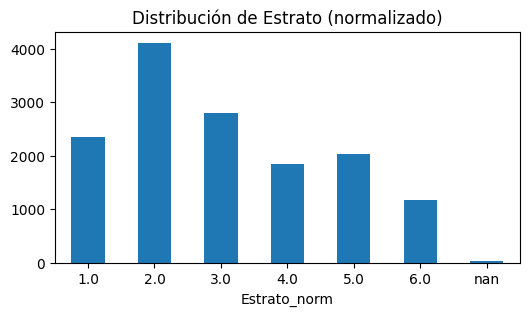

In [ ]:
# Copiamos el DF para no dañar el original
df_norm = df.copy()

# Paso 1: Convertir Estrato a numérico
df_norm["Estrato_norm"] = pd.to_numeric(df_norm["Estrato"], errors="coerce")

# Paso 2: Corregir casos fuera de rango (solo válidos 1 a 6)
df_norm.loc[~df_norm["Estrato_norm"].between(1, 6), "Estrato_norm"] = np.nan

# Paso 3: Revisar distribución
print("Distribución normalizada de Estrato:")
display(df_norm["Estrato_norm"].value_counts(dropna=False).sort_index())

# Paso 4: Gráfico normalizado
df_norm["Estrato_norm"].value_counts(dropna=False).sort_index().plot(
    kind="bar", figsize=(6,3), title="Distribución de Estrato (normalizado)"
)
plt.xticks(rotation=0)
plt.show()


Variables numéricas (además del ICFES)

Revisa si tienes más columnas numéricas, por ejemplo:


*   Edad del admitido
*   Puntajes específicos (lectura, matemáticas, etc.)
*   Año de admisión

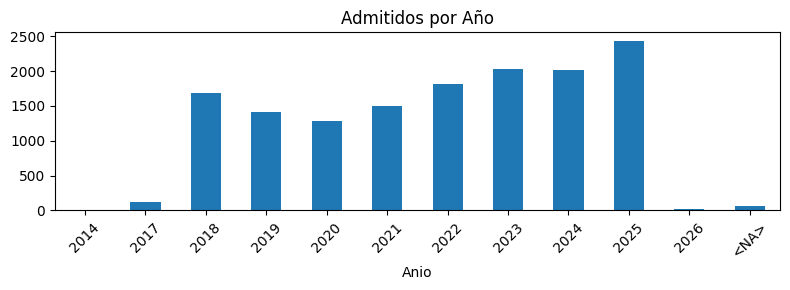

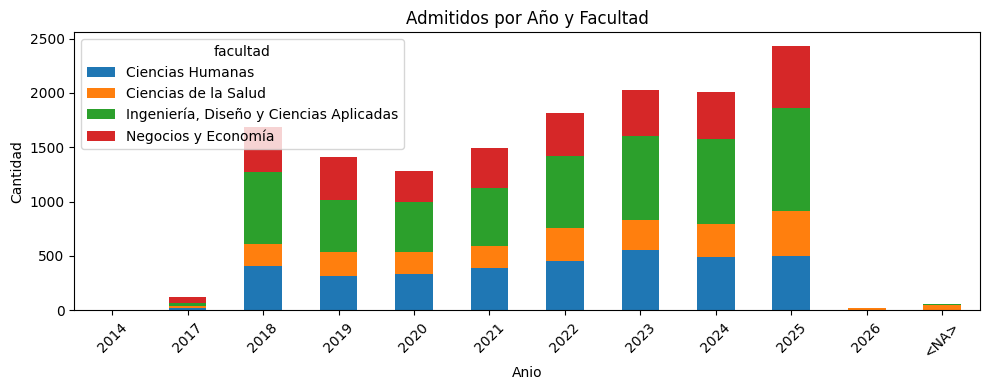

In [ ]:
# 1) Ajusta el nombre exacto si cambia
col_periodo = "Periodo Admisión"

# 2) Derivar año y semestre desde AAAASS
df["Periodo_str"] = df[col_periodo].astype("Int64").astype(str)
df["Anio"]       = df["Periodo_str"].str[:4]
df["Semestre"]   = df["Periodo_str"].str[4:6]

# 3) Barras: admitidos por año
df["Anio"].value_counts().sort_index().plot(kind="bar", figsize=(8,3), title="Admitidos por Año")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# 4) Barras apiladas: año x facultad
pd.crosstab(df["Anio"], df["facultad"]).plot(kind="bar", stacked=True, figsize=(10,4))
plt.title("Admitidos por Año y Facultad"); plt.ylabel("Cantidad")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

